# Implementation of Sleep Quality Prediction through Logistic Regression

# (i) import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [2]:
sleep_data= pd.read_csv('December Sleep data - Sheet1.csv')
print(sleep_data.head(10))

    DECEMBER        DATE  SLEEP SCORE HOURS OF Sleep  REM SLEEP  DEEP SLEEP  \
0   Tueasday  12-01-2021            1        8:09:00         23          19   
1  Wednesday  12-02-2021            1        7:33:00         23          19   
2   Thursday  12-03-2021            0        7:17:00         16          13   
3     Friday  12-04-2021            0        7:17:00         15          17   
4   Saturday  12-05-2021            1        8:23:00         20          15   
5     Sunday  12-06-2021            0        7:19:00         20          12   
6     Monday  12-07-2021            0        7:18:00         18          16   
7    Tuesday  12-08-2021            1        8:02:00         21          11   
8  Wednesday  12-09-2021            1        6:47:00         22          16   
9   Thursday  12-10-2021            1        7:32:00         12          14   

   HEART RATE BELOW RESTING        SLEEP TIME  Unnamed: 8  Minutes of Sleep  
0                        70  10:28pm - 7:29am       

# (ii)Analizing the Data

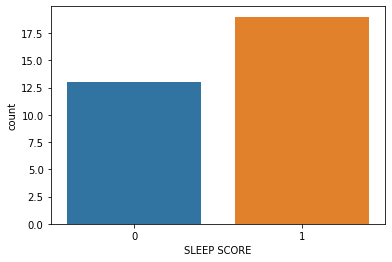

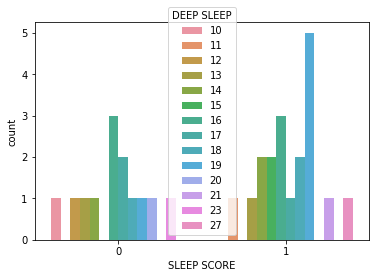

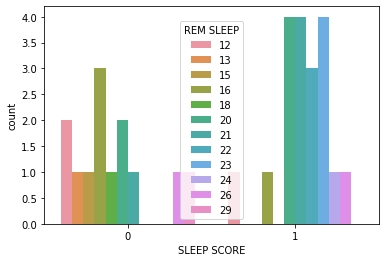

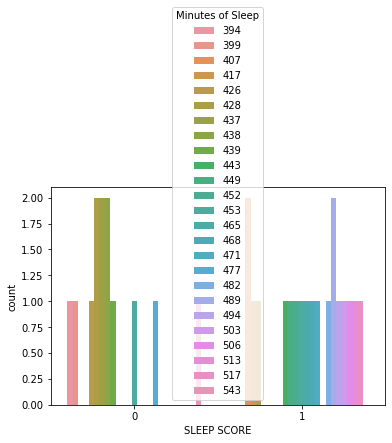

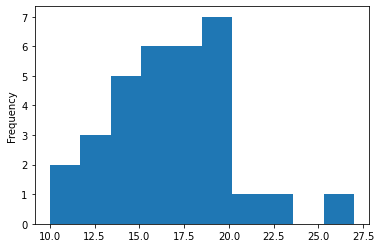

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DECEMBER                  32 non-null     object 
 1   DATE                      32 non-null     object 
 2   SLEEP SCORE               32 non-null     int64  
 3   HOURS OF Sleep            32 non-null     object 
 4   REM SLEEP                 32 non-null     int64  
 5   DEEP SLEEP                32 non-null     int64  
 6   HEART RATE BELOW RESTING  32 non-null     int64  
 7   SLEEP TIME                32 non-null     object 
 8   Unnamed: 8                0 non-null      float64
 9   Minutes of Sleep          32 non-null     int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 2.6+ KB


In [3]:
sns.countplot(x="SLEEP SCORE",data= sleep_data)
plt.show()
sns.countplot(x="SLEEP SCORE",hue="DEEP SLEEP",data= sleep_data)
plt.show()
sns.countplot(x="SLEEP SCORE",hue="REM SLEEP",data= sleep_data)
plt.show()
sns.countplot(x="SLEEP SCORE",hue="Minutes of Sleep",data= sleep_data)
plt.show()
sleep_data["DEEP SLEEP"].plot.hist()
plt.show()
sleep_data.info()

# (iii)Data Wrangling

   SLEEP SCORE  REM SLEEP  DEEP SLEEP  Minutes of Sleep
0            1         23          19               489
1            1         23          19               453
2            0         16          13               437
3            0         15          17               437
4            1         20          15               503
5            0         20          12               439
6            0         18          16               438
7            1         21          11               482
8            1         22          16               407
9            1         12          14               452


<AxesSubplot:xlabel='REM SLEEP', ylabel='DEEP SLEEP'>

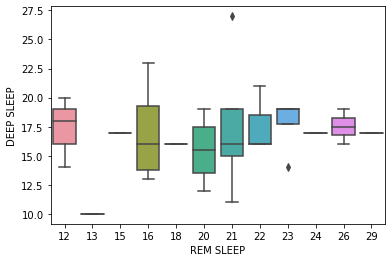

In [4]:
sleep_data.isnull()
sleep_data.dropna()
sleep_data.drop(['DECEMBER','DATE','SLEEP TIME','HOURS OF Sleep','Unnamed: 8','HEART RATE BELOW RESTING'],axis=1,inplace=True)
print(sleep_data.head(10))
sns.boxplot(x="REM SLEEP",y="DEEP SLEEP",data=sleep_data)

# (iv)Train and Testing

In [5]:
X= sleep_data.drop("SLEEP SCORE",axis=1)
Y= sleep_data["SLEEP SCORE"]

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=0)

from sklearn.linear_model import LogisticRegression
logmodel= LogisticRegression()
logmodel.fit(X_train,Y_train)
prediction= logmodel.predict(X_test)


from sklearn.metrics import classification_report
clas=classification_report(Y_test,prediction)
print(clas)

from sklearn.metrics import confusion_matrix
cnf=confusion_matrix(Y_test,prediction)
print("Confusion Matrix:")
print(cnf)

print("--------------------------------------------------------")
print("Testing Data:-")
print(X_test)
print("Prediction: ",prediction)
print("--------------------------------------------------------")

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.67      0.80         3

    accuracy                           0.86         7
   macro avg       0.90      0.83      0.84         7
weighted avg       0.89      0.86      0.85         7

Confusion Matrix:
[[4 0]
 [1 2]]
--------------------------------------------------------
Testing Data:-
    REM SLEEP  DEEP SLEEP  Minutes of Sleep
11         13          10               477
22         22          16               449
10         20          13               465
2          16          13               437
16         16          23               394
14         12          20               453
28         20          18               417
Prediction:  [0 1 1 0 0 0 0]
--------------------------------------------------------


# (v)Accuracy Check

In [6]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(Y_test,prediction)
print("Accuracy: ",acc)

Accuracy:  0.8571428571428571


# (vi) Prediction Model

In [7]:
input_data=(15,17,437)

input_data_as_numpy_array= np.asarray(input_data)

input_data_as_numpy_array_reshaped= input_data_as_numpy_array.reshape(1,-1)

predicti= logmodel.predict(input_data_as_numpy_array_reshaped)
print(predicti)

if(predicti[0]==1):
    print("Good Sleep")
else:
    print("Bad Sleep")

[0]
Bad Sleep


c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [8]:
input_data=(23,19,489)

input_data_as_numpy_array= np.asarray(input_data)

input_data_as_numpy_array_reshaped= input_data_as_numpy_array.reshape(1,-1)

predicti= logmodel.predict(input_data_as_numpy_array_reshaped)
print(predicti)

if(predicti[0]==1):
    print("Good Sleep")
else:
    print("Bad Sleep")

[1]
Good Sleep


c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [9]:
n= int(input("Enter the no of inputs: "))
input_list=list(map(int,input("Enter the numbers: ").strip().split()))[:n]
print(input_list)

[13, 15, 456]


In [10]:
n= int(input("Enter the no of inputs: "))
input_list=list(map(int,input("Enter the numbers: ").strip().split()))[:n]

input_data_as_numpy_array= np.asarray(input_list)

input_data_as_numpy_array_reshaped= input_data_as_numpy_array.reshape(1,-1)

predicti= logmodel.predict(input_data_as_numpy_array_reshaped)
print(predicti)

if(predicti[0]==1):
    print("Good Sleep")
else:
    print("Bad Sleep")

[0]
Bad Sleep


c:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
